Chapter -5 Outliers Detection and Handling

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Outlier Detection
# An outlier is a data point that differs significantly from other data points
# Outliers can affect the results of data analysis
# Outliers can be detected using statistical methods
# Outliers can be removed or imputed
# outliers only in numerical data not in categorical data

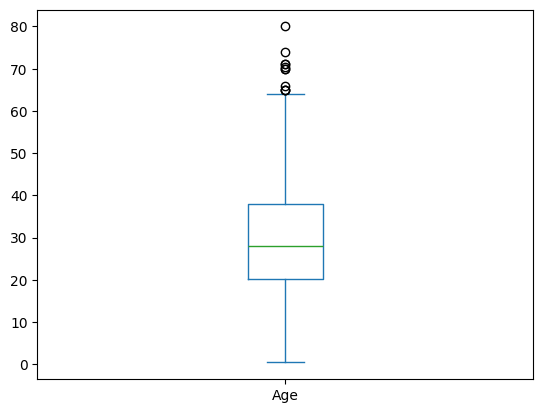

In [4]:
# How to Detect Outliers?
# 1. Box Plot
import matplotlib.pyplot as plt
df['Age'].plot(kind='box')
plt.show()


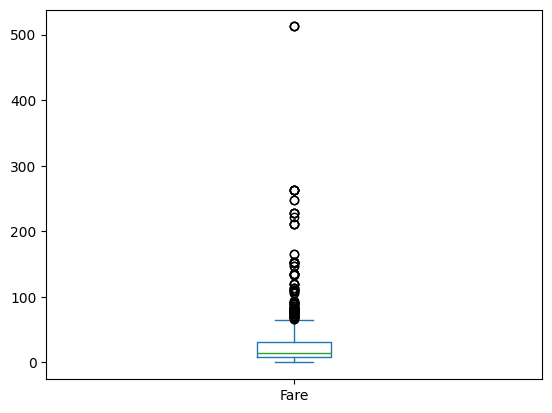

In [5]:
# How to Detect Outliers?
# 1. Box Plot

import matplotlib.pyplot as plt
df['Fare'].plot(kind='box')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

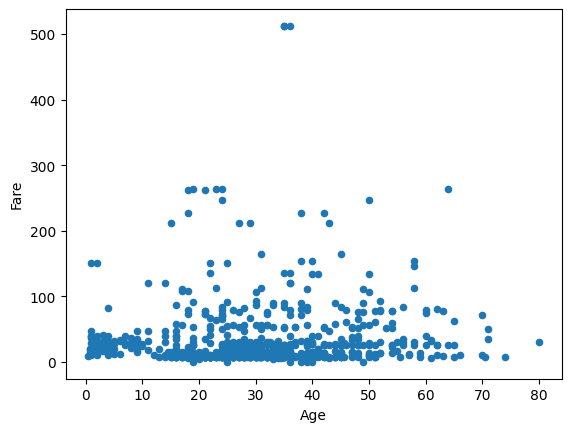

In [6]:
# Outlier Detection using scatter plot
df.plot.scatter(x='Age', y='Fare')

In [7]:
# Outlier Detection using Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
import numpy as np

# Fill missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Calculate mean and standard deviation
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Set Z-Score threshold
threshold = 3

# Identify outliers directly
outliers = df[np.abs((df['Age'] - mean_age) / std_age) > threshold]

print("Outliers in the 'Age' column:")
print(outliers[['Age']])


Outliers in the 'Age' column:
      Age
96   71.0
116  70.5
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


C:\Users\user\AppData\Local\Temp\ipykernel_2284\2337649272.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [27]:
# Remove Outliers for Normal Distribution (Z-Score)(age)


df = df[np.abs((df['Age'] - mean_age) / std_age) <= threshold]


In [28]:
# Now all outliers from age has been removed, you can verify through
# Identify outliers
outliers = df[np.abs((df['Age'] - mean_age) / std_age) > threshold]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in the 'Age' column: {num_outliers}")

Number of outliers in the 'Age' column: 0


In [29]:
# As you can see here there is no more outliers in Age

In [35]:
# Outlier Detection for left and right Skewed Distribution Using IQR 

# Fill missing values in 'Fare' with its median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Calculate IQR
Q1 = df['Fare'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Fare'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                   # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers directly
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

# Print the outliers
print("Outliers in the 'Fare' column:")
print(outliers)



Outliers in the 'Fare' column:
     PassengerId  Survived  Pclass  \
54            55         0       1   
74            75         1       3   
92            93         0       1   
97            98         1       1   
155          156         0       1   
166          167         1       1   
169          170         0       3   
309          310         1       1   
329          330         1       1   
356          357         1       1   
370          371         1       1   
434          435         0       1   
509          510         1       3   
513          514         1       1   
523          524         1       1   
577          578         1       1   
599          600         1       1   
615          616         1       2   
643          644         1       3   
690          691         1       1   
692          693         1       3   
754          755         1       2   
781          782         1       1   
826          827         0       3   
838          839   

C:\Users\user\AppData\Local\Temp\ipykernel_2284\1955868578.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [36]:
# Remove outliers directly from the main 'Fare' column
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
